Directory,Libraries and data


In [ ]:
%cd /content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
#libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading the data
df = pd.read_csv("Clothing.csv")
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [ ]:
df.describe()


,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


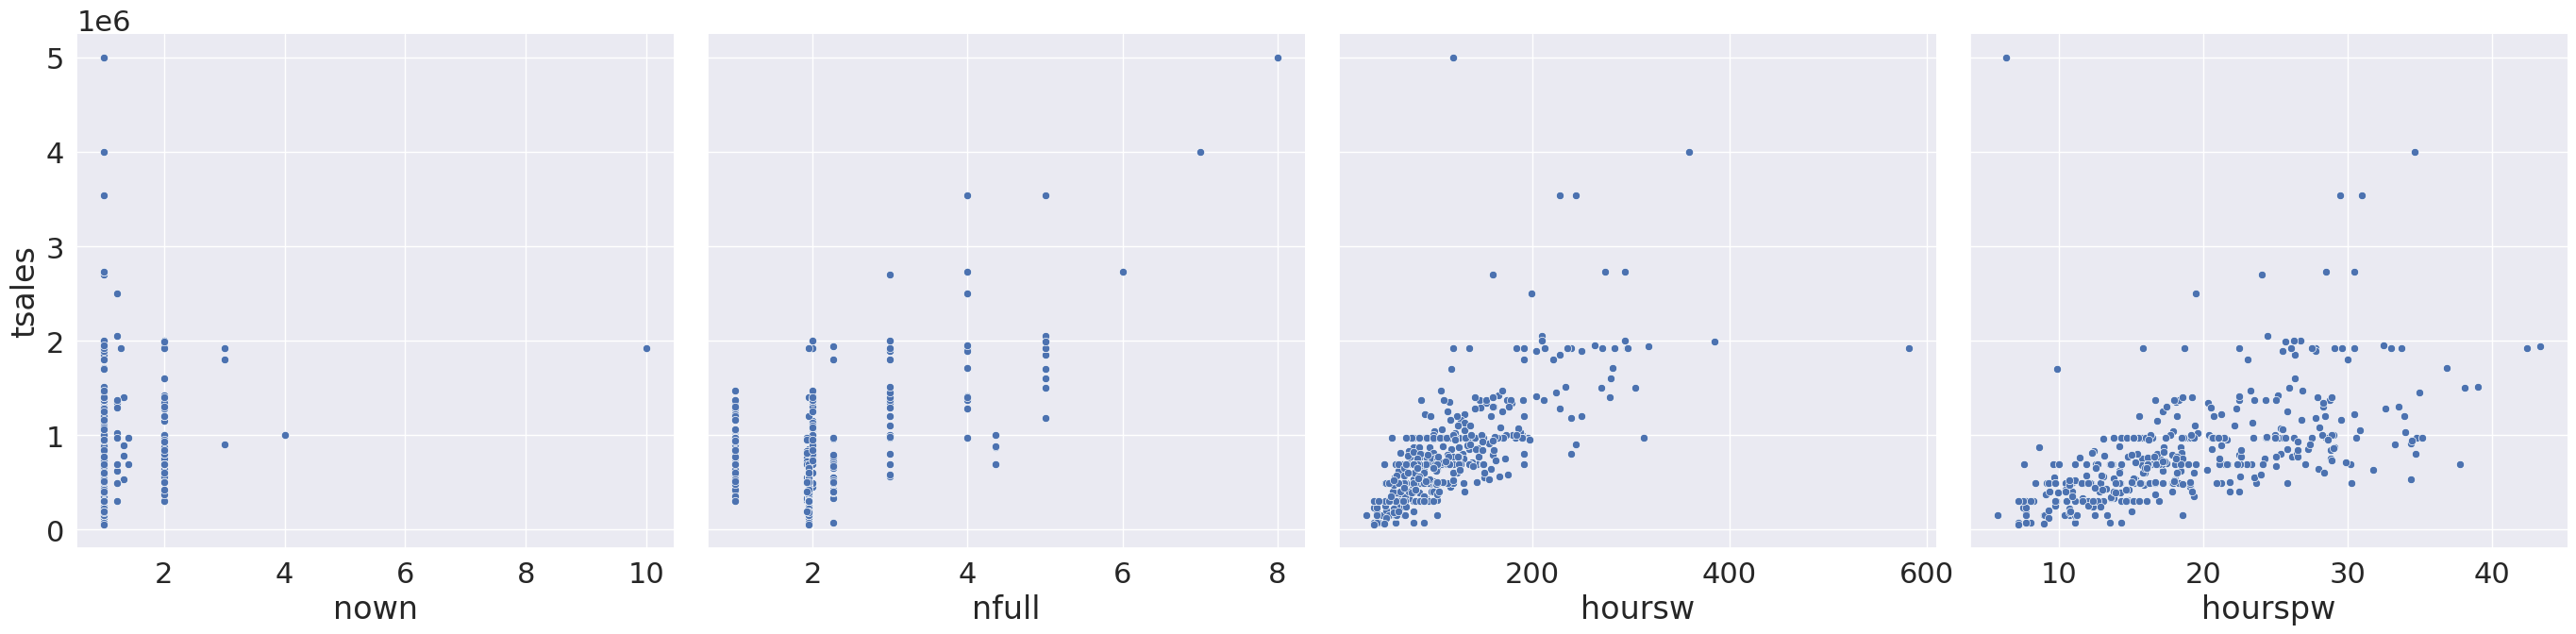

In [ ]:
sns.set(font_scale = 2)
sns.pairplot(data = df,
             x_vars= ["nown","nfull","hoursw","hourspw"],
             y_vars= "tsales",
             height= 7)

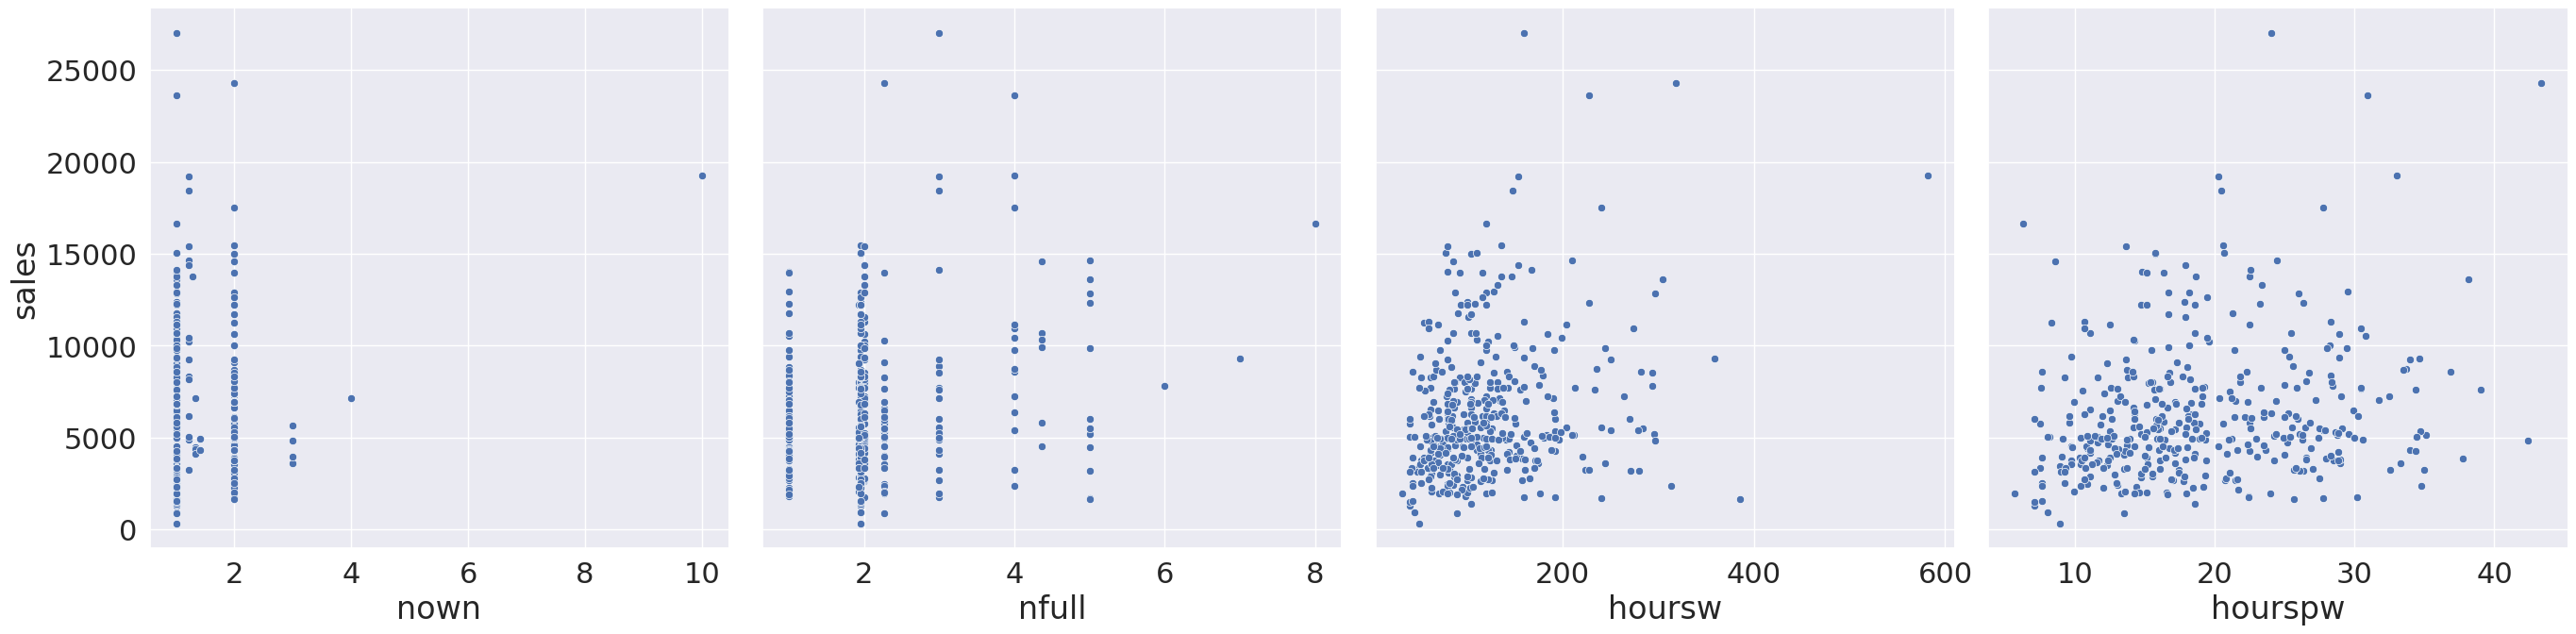

In [ ]:
sns.set(font_scale = 2)
sns.pairplot(data = df,
             x_vars= ["nown","nfull","hoursw","hourspw"],
             y_vars= "sales",
             height= 7)

<Axes: >

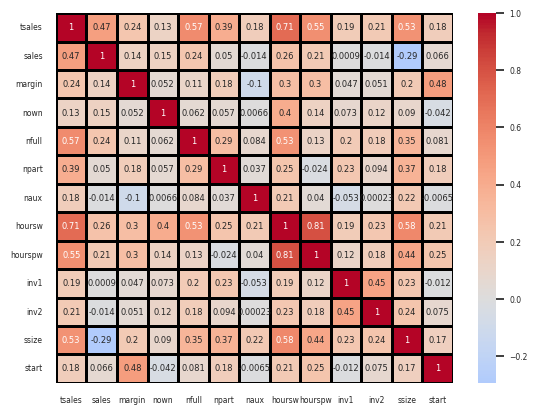

In [ ]:

sns.set(font_scale = 0.5)
sns.heatmap(data = df.corr(),
            fmt= ".2g",
            cmap = "coolwarm",
            annot = True,
            linecolor = "black",
            linewidths= 1,
            center = 0)

In [ ]:
y = df.tsales/1000
x = df.drop(columns = ["tsales","sales","margin","nown","npart","naux","hourspw","inv1","inv2","start"])
x

,nfull,hoursw,ssize
0,1.0000,76,170
1,2.0000,192,450
2,2.0000,114,300
3,1.0000,100,260
4,1.9556,104,50
...,...,...,...
395,1.9231,104,100
396,8.0000,120,300
397,1.0000,92,100
398,2.0000,170,375


In [ ]:
x = sm.add_constant(x)
x

,const,nfull,hoursw,ssize
0,1.0,1.0000,76,170
1,1.0,2.0000,192,450
2,1.0,2.0000,114,300
3,1.0,1.0000,100,260
4,1.0,1.9556,104,50
...,...,...,...,...
395,1.0,1.9231,104,100
396,1.0,8.0000,120,300
397,1.0,1.0000,92,100
398,1.0,2.0000,170,375


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,
                                 test_size = 0.2,
                                 random_state = 1502)
X_train.head()


,const,nfull,hoursw,ssize
201,1.0,2.0000,297,400
25,1.0,2.0000,124,160
94,1.0,1.9556,104,200
346,1.0,3.0000,224,450
121,1.0,2.0000,122,350


In [ ]:
model2= sm.OLS(y_train,X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     127.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.03e-54
Time:                        14:26:05   Log-Likelihood:                -2357.4
No. Observations:                 320   AIC:                             4723.
Df Residuals:                     316   BIC:                             4738.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -200.4161     58.105     -3.449      0.0

In [ ]:
# predictions
predictions = model2.predict(X_test)
predictions[:4]

270    3056.079618
380     827.201582
326     929.576129
60      491.762707
dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(round(mean_absolute_error(y_test,predictions),1))
print(round(np.sqrt(mean_squared_error(y_test,predictions)),1))

277.8
392.6
